In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
df=pd.read_csv('C:/Users/91861/Downloads/fish.csv')
df

,Species,Weight,V_length,D_length,C_length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [6]:
x_=df.iloc[:,1:]
y_=df.iloc[:,:-6]

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_)
x_=sc.transform(x_)

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_=le.fit_transform(y_)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5], dtype=int64)

In [30]:
#Splitting data into train and testing set
x_train,x_test,y_train,y_test=train_test_split(x_,y_,test_size=0.2,random_state=42)

In [32]:
#Import Logistic Regression model for Model buliding
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
lr_pred=lr.predict(x_test)

In [52]:
#Metrics for model Evaluation
lr_acc=accuracy_score(y_test,lr_pred)
print('Accuracy of the Logistic Regerssion model:',lr_acc*100,'%')

Accuracy of the Logistic Regerssion model: 87.5 %


In [46]:
#Confusion metrics for Evaluation
from sklearn.metrics import confusion_matrix,classification_report
lr_cm=confusion_matrix(y_test,lr_pred)
lr_cm

array([[10,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  3,  0,  0,  0,  0]], dtype=int64)

In [50]:
#Classifiacation report
lr_cr=classification_report(y_test,lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         1
           2       0.69      1.00      0.82         9
           3       1.00      1.00      1.00         3
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         5
           6       0.00      0.00      0.00         3

    accuracy                           0.88        32
   macro avg       0.67      0.71      0.69        32
weighted avg       0.79      0.88      0.82        32



C:\Users\91861\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91861\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91861\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [83]:
#small prediction
exm=x_[[0]]
pred=lr.predict(exm)
pred=le.inverse_transform(pred)
pred

array([0], dtype=int64)

<Axes: >

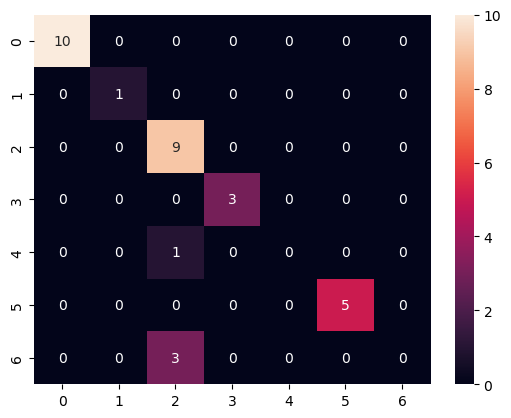

In [87]:
import seaborn as sns
sns.heatmap(data=lr_cm,annot=True,fmt='d')
